Naming scheme: The number in the list / file names deneotes the radius of the planet in the transit (ex. 1.75 REarth transits -> truelists175, etc.). All simulated transits aree generated in the period range 4 -10 d with thee exceeeption of the "long" files, which have periods in a larger range of 4 - 30 d.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# import data
falsedata = np.load('falsepositive230.npy',allow_pickle=True) # false positive data (no transits)
truedata3 = np.load('3RETransits230ppm.npy',allow_pickle=True) # results with transits, R = 3 REarth

In [2]:
falselists = {} # dictionary for lists of binned SDEs for false positive data
truelists3 = {} # dictionary for lists of binned SDEs for true positive data
binList = np.arange(0.0,13.0,0.5) # values for the borders of the period bins with width 0.5 d

for i in range(0,len(binList)-1):
    SDEbin =  np.zeros(0,float) # array to store SDE values from each period bin
    # bin and save the SDEs by period fr every result in the false positive sample
    for j in range(0,len(falsedata)):
        period = falsedata[j].periods # periods from periodogram for each result in sample
        SDEs = falsedata[j].power # SDEs from periodograms for each result in sample
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])] # save SDEs in desired period range using array masking
        SDEbin = np.append(SDEbin,powerBin) # add to list of SDEs in this bin from all other light curves in sample so far
    falselists['list_%s' % i] = SDEbin # save results to dictionary
    
    # repeat same steps for true positive data
    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata3)):
        period = truedata3[k].periods
        SDEs = truedata3[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists3['list_%s' % i] = SDEbin

In [4]:
periodvals = [] # values of periods for the plot
pvals3 = [] # list of p-values from K-S test for each period bin

# perform K-S test for each period bin bin
for i in range(1,len(binList)-1):
    periodvals.append(binList[i] + (binList[i+1]-binList[i])/2) # period values on figure are at center of each bin
    pvals3.append(stats.ks_2samp(truelists3['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists3['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

Ks_2sampResult(statistic=0.31628905268905266, pvalue=0.0)
Ks_2sampResult(statistic=0.299560917300279, pvalue=0.0)
Ks_2sampResult(statistic=0.2866927011044658, pvalue=0.0)
Ks_2sampResult(statistic=0.26949564949564947, pvalue=0.0)
Ks_2sampResult(statistic=0.25757532726524973, pvalue=0.0)
Ks_2sampResult(statistic=0.24470990220990219, pvalue=0.0)
Ks_2sampResult(statistic=0.246642524877819, pvalue=0.0)
Ks_2sampResult(statistic=0.2291852964075186, pvalue=5.03731921335155e-299)
Ks_2sampResult(statistic=0.2078022466911356, pvalue=3.2102834566184463e-215)
Ks_2sampResult(statistic=0.20884236087939792, pvalue=2.207026372159149e-186)
Ks_2sampResult(statistic=0.18704954954954955, pvalue=5.048026399926793e-133)
Ks_2sampResult(statistic=0.2054503340549852, pvalue=9.887056383938954e-144)
Ks_2sampResult(statistic=0.17211339544672877, pvalue=1.2133142994672693e-91)
Ks_2sampResult(statistic=0.19175060775060773, pvalue=4.943404184252088e-102)
Ks_2sampResult(statistic=0.1549701216367883, pvalue=5.337128913

Text(0.5, 1.0, 'P-Value Versus Period, 3 REarth, 230 ppm')

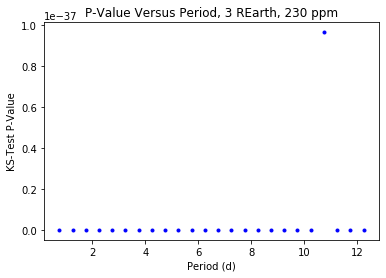

In [5]:
# plot the results

plt.plot(periodvals,pvals3,"b.")
plt.xlabel("Period (d)")
plt.ylabel("KS-Test P-Value")
plt.title("P-Value Versus Period, 3 REarth, 230 ppm")

Ks_2sampResult(statistic=0.1111954681954682, pvalue=0.0)
Ks_2sampResult(statistic=0.10989241901475945, pvalue=0.0)
Ks_2sampResult(statistic=0.10647702324172913, pvalue=1.804128292670568e-213)
Ks_2sampResult(statistic=0.0983794445332907, pvalue=1.4323426940137865e-129)
Ks_2sampResult(statistic=0.08785203808459621, pvalue=4.91412801371997e-79)
Ks_2sampResult(statistic=0.08729055979055977, pvalue=5.411996989390293e-63)
Ks_2sampResult(statistic=0.06586515927692405, pvalue=1.5357356580422946e-29)
Ks_2sampResult(statistic=0.06406809587365142, pvalue=9.258578737446986e-24)
Ks_2sampResult(statistic=0.05539475983920429, pvalue=1.0897403348461906e-15)
Ks_2sampResult(statistic=0.04582601119638158, pvalue=2.225270588180299e-09)
Ks_2sampResult(statistic=0.04045524691358027, pvalue=1.2544123229809415e-06)
Ks_2sampResult(statistic=0.04746234606699723, pvalue=4.4979118087726004e-08)
Ks_2sampResult(statistic=0.05131131131131128, pvalue=1.5623981838671358e-08)
Ks_2sampResult(statistic=0.0293728013728014

Text(0.5, 1.0, 'P-Value Versus Period, 2 REarth, 230 ppm')

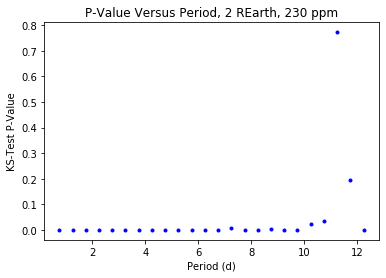

In [6]:
# repeat steps for sampeles with other transit parameters

truedata2 = np.load('2RETransits230ppm.npy',allow_pickle=True) # planets in this sample have radius 2 REarth

truelists2 = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata2)):
        period = truedata2[k].periods
        SDEs = truedata2[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists2['list_%s' % i] = SDEbin

pvals2 = []

for i in range(1,len(binList)-1):
    pvals2.append(stats.ks_2samp(truelists2['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists2['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))


plt.plot(periodvals,pvals2,"b.")
plt.xlabel("Period (d)")
plt.ylabel("KS-Test P-Value")
plt.title("P-Value Versus Period, 2 REarth, 230 ppm")

Ks_2sampResult(statistic=0.05277728637728636, pvalue=2.1970003189331758e-121)
Ks_2sampResult(statistic=0.05350555342576621, pvalue=2.0467341019957086e-85)
Ks_2sampResult(statistic=0.048123838123838136, pvalue=6.052895275348572e-44)
Ks_2sampResult(statistic=0.04253969946277637, pvalue=1.4267176132319247e-24)
Ks_2sampResult(statistic=0.039073957678608884, pvalue=5.629231481081542e-16)
Ks_2sampResult(statistic=0.03447457072457083, pvalue=3.482197608224371e-10)
Ks_2sampResult(statistic=0.03928752281693457, pvalue=8.754053088260474e-11)
Ks_2sampResult(statistic=0.02029376598821042, pvalue=0.009116382004720367)
Ks_2sampResult(statistic=0.015729221284776843, pvalue=0.11756675115559315)
Ks_2sampResult(statistic=0.03183387090794498, pvalue=9.557042473617968e-05)
Ks_2sampResult(statistic=0.026497747747747713, pvalue=0.0043656822202985295)
Ks_2sampResult(statistic=0.03220825476639433, pvalue=0.0006012647455441848)
Ks_2sampResult(statistic=0.0404807371474038, pvalue=1.799173813359911e-05)
Ks_2samp

Text(0.5, 1.0, 'P-Value Versus Period, 1.75 REarth, 230 ppm')

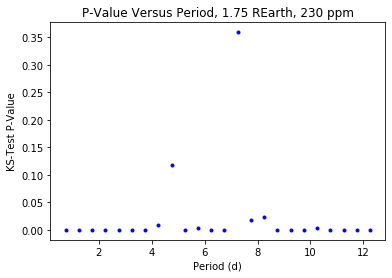

In [39]:
truedata175 = np.load('175RETransits230ppm.npy',allow_pickle=True)

truelists175 = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata175)):
        period = truedata175[k].periods
        SDEs = truedata175[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists175['list_%s' % i] = SDEbin

pvals175 = []

for i in range(1,len(binList)-1):
    pvals175.append(stats.ks_2samp(truelists175['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists175['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals175,"b.")
plt.xlabel("Period (d)")
plt.ylabel("KS-Test P-Value")
plt.title("P-Value Versus Period, 1.75 REarth, 230 ppm")

Ks_2sampResult(statistic=0.02018573118573108, pvalue=4.043101480240448e-18)
Ks_2sampResult(statistic=0.015384027644665926, pvalue=1.883645480839601e-07)
Ks_2sampResult(statistic=0.024286008697773392, pvalue=1.650715505206219e-11)
Ks_2sampResult(statistic=0.017929171775325603, pvalue=0.00010273109929092373)
Ks_2sampResult(statistic=0.020198027484849224, pvalue=0.00013991074182974746)
Ks_2sampResult(statistic=0.020100966350966365, pvalue=0.0009621366905913188)
Ks_2sampResult(statistic=0.016001177648236498, pvalue=0.038256345882186835)
Ks_2sampResult(statistic=0.015962212212212196, pvalue=0.0712146840638246)
Ks_2sampResult(statistic=0.012846973958085095, pvalue=0.30100051817112017)
Ks_2sampResult(statistic=0.016069031994957905, pvalue=0.15845094836838647)
Ks_2sampResult(statistic=0.020680055055055047, pvalue=0.04788881984268375)
Ks_2sampResult(statistic=0.013952324417440765, pvalue=0.43209321275824253)
Ks_2sampResult(statistic=0.018878365545032222, pvalue=0.15972825579932895)
Ks_2sampResu

Text(0.5, 1.0, 'P-Value Versus Period, 1.5 REarth, 230 ppm')

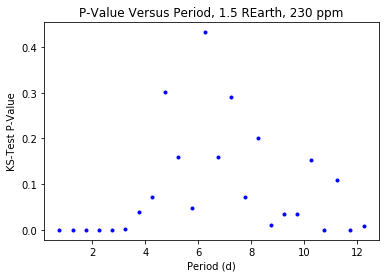

In [44]:
truedata15 = np.load('15RETransits230ppm.npy',allow_pickle=True)

truelists15 = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata15)):
        period = truedata15[k].periods
        SDEs = truedata15[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists15['list_%s' % i] = SDEbin

pvals15 = []

for i in range(1,len(binList)-1):
    pvals15.append(stats.ks_2samp(truelists15['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists15['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals15,"b.")
plt.xlabel("Period (d)")
plt.ylabel("KS-Test P-Value")
plt.title("P-Value Versus Period, 1.5 REarth, 230 ppm")

Ks_2sampResult(statistic=0.006985785785785792, pvalue=0.015198941194229043)
Ks_2sampResult(statistic=0.005997194002513084, pvalue=0.17100797572037787)
Ks_2sampResult(statistic=0.01117138146549912, pvalue=0.00903375048461068)
Ks_2sampResult(statistic=0.009448442525365586, pvalue=0.12873644675079293)
Ks_2sampResult(statistic=0.007028035787725706, pvalue=0.60860080013373)
Ks_2sampResult(statistic=0.00989787864787861, pvalue=0.31253533693631996)
Ks_2sampResult(statistic=0.007973149620208453, pvalue=0.7098245579112576)
Ks_2sampResult(statistic=0.01053456234011789, pvalue=0.46190852654704695)
Ks_2sampResult(statistic=0.011759855093188443, pvalue=0.40678285969566996)
Ks_2sampResult(statistic=0.013665702739776742, pvalue=0.3184341821411136)
Ks_2sampResult(statistic=0.014170420420420424, pvalue=0.3449480926552342)
Ks_2sampResult(statistic=0.03532416137067296, pvalue=0.0001160529398678781)
Ks_2sampResult(statistic=0.03150175816842482, pvalue=0.0017591007753994259)
Ks_2sampResult(statistic=0.0247

Text(0.5, 1.0, 'P-Value Versus Period, 1.25 REarth, 230 ppm')

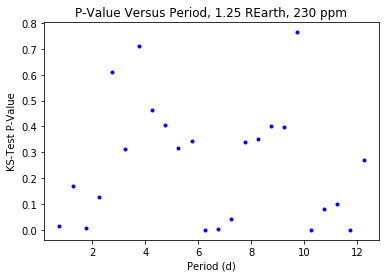

In [45]:
truedata125 = np.load('125RETransits230ppm.npy',allow_pickle=True)

truelists125 = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata125)):
        period = truedata125[k].periods
        SDEs = truedata125[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists125['list_%s' % i] = SDEbin

pvals125 = []

for i in range(1,len(binList)-1):
    pvals125.append(stats.ks_2samp(truelists125['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists125['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals125,"b.")
plt.xlabel("Period (d)")
plt.ylabel("KS-Test P-Value")
plt.title("P-Value Versus Period, 1.25 REarth, 230 ppm")

Ks_2sampResult(statistic=0.008210119210119216, pvalue=0.0023653122749449575)
Ks_2sampResult(statistic=0.008363656209400883, pvalue=0.016764267620310885)
Ks_2sampResult(statistic=0.008714554891025461, pvalue=0.07480376512984814)
Ks_2sampResult(statistic=0.00788960558191329, pvalue=0.29447744574428675)
Ks_2sampResult(statistic=0.008549014130409538, pvalue=0.35816955599230926)
Ks_2sampResult(statistic=0.011101004851004848, pvalue=0.19441248155689136)
Ks_2sampResult(statistic=0.005855502561384951, pvalue=0.9537537214040596)
Ks_2sampResult(statistic=0.010352296741185651, pvalue=0.4844962474616752)
Ks_2sampResult(statistic=0.012349810127587957, pvalue=0.34679328436701706)
Ks_2sampResult(statistic=0.011662032402773193, pvalue=0.5166485386419504)
Ks_2sampResult(statistic=0.017377377377377434, pvalue=0.14336167271076827)
Ks_2sampResult(statistic=0.02099983704634867, pvalue=0.06365126919478176)
Ks_2sampResult(statistic=0.015663355663355666, pvalue=0.34930425174915164)
Ks_2sampResult(statistic=0.

Text(0.5, 1.0, 'P-Value Versus Period, False Positives, 230 ppm')

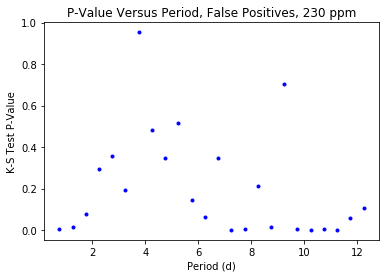

In [47]:
truedata0 = np.load('0RETransits230ppm.npy',allow_pickle=True)

truelists0 = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata0)):
        period = truedata0[k].periods
        SDEs = truedata0[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists0['list_%s' % i] = SDEbin

pvals0 = []

for i in range(1,len(binList)-1):
    pvals0.append(stats.ks_2samp(truelists0['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists0['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals0,"b.")
plt.xlabel("Period (d)")
plt.ylabel("K-S Test P-Value")
plt.title("P-Value Versus Period, False Positives, 230 ppm")

Ks_2sampResult(statistic=0.06484253344253343, pvalue=5.202102513290437e-183)
Ks_2sampResult(statistic=0.06146273933507976, pvalue=1.4205340875132905e-112)
Ks_2sampResult(statistic=0.055320152084857965, pvalue=6.213803611668924e-58)
Ks_2sampResult(statistic=0.05222494684033145, pvalue=8.080653732397456e-37)
Ks_2sampResult(statistic=0.04845263868519682, pvalue=2.452097690219597e-24)
Ks_2sampResult(statistic=0.03277845152845149, pvalue=3.0096566745450564e-09)
Ks_2sampResult(statistic=0.028193840899723238, pvalue=9.254137310114488e-06)
Ks_2sampResult(statistic=0.028179429429429442, pvalue=6.121372003357088e-05)
Ks_2sampResult(statistic=0.014828002605780322, pvalue=0.16111217883276838)
Ks_2sampResult(statistic=0.015132169206243273, pvalue=0.21097425659509478)
Ks_2sampResult(statistic=0.02007945445445447, pvalue=0.059293255188956645)
Ks_2sampResult(statistic=0.01723258141862792, pvalue=0.19606898909496404)
Ks_2sampResult(statistic=0.02647929981263314, pvalue=0.013867390542836892)
Ks_2sampRes

Text(0.5, 1.0, 'P-Value Versus Period, 2 Earth Radii, Large Period Range, 230 ppm')

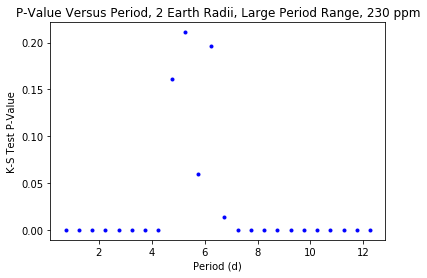

In [50]:
truedata2Long = np.load('Long2RETransits230ppm.npy',allow_pickle=True)

truelists2Long = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata2Long)):
        period = truedata2Long0[k].periods
        SDEs = truedata2Long[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists2Long['list_%s' % i] = SDEbin

pvals2Long = []

for i in range(1,len(binList)-1):
    pvals2Long.append(stats.ks_2samp(truelists2Long['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists2Long['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals2Long,"b.")
plt.xlabel("Period (d)")
plt.ylabel("K-S Test P-Value")
plt.title("P-Value Versus Period, 2 Earth Radii, Large Period Range, 230 ppm")

Ks_2sampResult(statistic=0.026370552370552358, pvalue=1.2667117417013156e-30)
Ks_2sampResult(statistic=0.026694779886269254, pvalue=1.3981766654134492e-21)
Ks_2sampResult(statistic=0.024886525180642827, pvalue=4.6002627398079615e-12)
Ks_2sampResult(statistic=0.019622403468557315, pvalue=1.4563881371442476e-05)
Ks_2sampResult(statistic=0.021931155962163718, pvalue=2.524479780999179e-05)
Ks_2sampResult(statistic=0.01747824747824747, pvalue=0.0062022133614773964)
Ks_2sampResult(statistic=0.02314691161749982, pvalue=0.0005073404442001364)
Ks_2sampResult(statistic=0.02105758536314095, pvalue=0.006029323538937291)
Ks_2sampResult(statistic=0.016758027869138936, pvalue=0.08018476571212779)
Ks_2sampResult(statistic=0.01619044970896827, pvalue=0.15248195940228776)
Ks_2sampResult(statistic=0.012941066066066043, pvalue=0.4580265450341227)
Ks_2sampResult(statistic=0.02886630816863378, pvalue=0.0029650317878735853)
Ks_2sampResult(statistic=0.017958471291804612, pvalue=0.2029978597154608)
Ks_2sampRes

Text(0.5, 1.0, 'P-Value Versus Period, 2 Earth Radii, Large Period Range, 230 ppm')

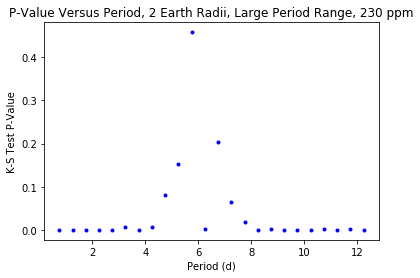

In [7]:
truedata175Long = np.load('Long175RETransits230ppm.npy',allow_pickle=True)

truelists175Long = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata175Long)):
        period = truedata175Long[k].periods
        SDEs = truedata175Long[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists175Long['list_%s' % i] = SDEbin

pvals175Long = []

for i in range(1,len(binList)-1):
    pvals175Long.append(stats.ks_2samp(truelists175Long['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists175Long['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals175Long,"b.")
plt.xlabel("Period (d)")
plt.ylabel("K-S Test P-Value")
plt.title("P-Value Versus Period, 2 Earth Radii, Large Period Range, 230 ppm")

Ks_2sampResult(statistic=0.01476782236782237, pvalue=6.767452943673911e-10)
Ks_2sampResult(statistic=0.015902285263987403, pvalue=6.217834171242212e-08)
Ks_2sampResult(statistic=0.012848268436503746, pvalue=0.001581189001108507)
Ks_2sampResult(statistic=0.009583784968400288, pvalue=0.11894741295853184)
Ks_2sampResult(statistic=0.011169076052796933, pvalue=0.10724336609987947)
Ks_2sampResult(statistic=0.009892584892584821, pvalue=0.31314780355703814)
Ks_2sampResult(statistic=0.013560383913325036, pvalue=0.1166430843654804)
Ks_2sampResult(statistic=0.012017156044933808, pvalue=0.30100873767196684)
Ks_2sampResult(statistic=0.01515499626610739, pvalue=0.14402079243222038)
Ks_2sampResult(statistic=0.010592073555036552, pvalue=0.6404800908033876)
Ks_2sampResult(statistic=0.009252168835502173, pvalue=0.8491829281972274)
Ks_2sampResult(statistic=0.016820075889843245, pvalue=0.21874546850723303)
Ks_2sampResult(statistic=0.009472036138702788, pvalue=0.9081001016285786)
Ks_2sampResult(statistic=0

Text(0.5, 1.0, 'P-Value Versus Period, 1.5 Earth Radii, Large Period Range, 230 ppm')

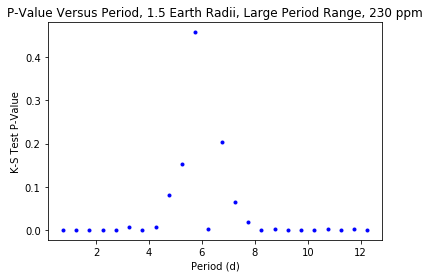

In [8]:
truedata15Long = np.load('Long15RETransits230ppm.npy',allow_pickle=True)

truelists15Long = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata15Long)):
        period = truedata15Long[k].periods
        SDEs = truedata15Long[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists15Long['list_%s' % i] = SDEbin

pvals15Long = []

for i in range(1,len(binList)-1):
    pvals15Long.append(stats.ks_2samp(truelists175Long['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists15Long['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals15Long,"b.")
plt.xlabel("Period (d)")
plt.ylabel("K-S Test P-Value")
plt.title("P-Value Versus Period, 1.5 Earth Radii, Large Period Range, 230 ppm")

Ks_2sampResult(statistic=0.008908464828464857, pvalue=2.260732758257336e-19)
Ks_2sampResult(statistic=0.008196188209486088, pvalue=2.171630902844762e-11)
Ks_2sampResult(statistic=0.010179641826700642, pvalue=3.939859736299161e-11)
Ks_2sampResult(statistic=0.006174274866582508, pvalue=0.0031949233482596105)
Ks_2sampResult(statistic=0.008057460561336521, pvalue=0.0004630443443336875)
Ks_2sampResult(statistic=0.008002059752059809, pvalue=0.0025723142198760102)
Ks_2sampResult(statistic=0.005523311546840937, pvalue=0.14970806046328505)
Ks_2sampResult(statistic=0.004725197419641863, pvalue=0.39783331327762433)
Ks_2sampResult(statistic=0.007612437834660091, pvalue=0.05203470729674059)
Ks_2sampResult(statistic=0.007802265228191163, pvalue=0.0748305349837991)
Ks_2sampResult(statistic=0.007000208541875219, pvalue=0.1903898292053038)
Ks_2sampResult(statistic=0.01127336638964549, pvalue=0.008489398921931485)
Ks_2sampResult(statistic=0.01860545160545163, pvalue=2.7595315641903657e-06)
Ks_2sampResul

Text(0.5, 1.0, 'P-Value Versus Period, 1.5 REarth, 230 ppm, 1000 LC Sample')

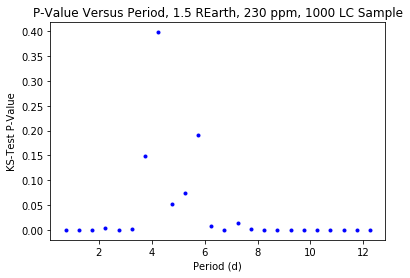

In [7]:
# 1.5 REarth test with larger sample (1000 light curves)

truedata15_Large = np.load('15RETransits230ppm_Large.npy',allow_pickle=True)

truelists15_Large = {}

for i in range(0,len(binList)-1):

    SDEbin =  np.zeros(0,float)
    for k in range(0,len(truedata15_Large)):
        period = truedata15_Large[k].periods
        SDEs = truedata15_Large[k].power
        powerBin = SDEs[(period >= binList[i]) & (period < binList[i+1])]
        SDEbin = np.append(SDEbin,powerBin)
    truelists15_Large['list_%s' % i] = SDEbin

pvals15_Large = []

for i in range(1,len(binList)-1):
    pvals15_Large.append(stats.ks_2samp(truelists15_Large['list_%s' % i],falselists['list_%s' % i],alternative='two-sided')[1])
    print(stats.ks_2samp(truelists15_Large['list_%s' % i],falselists['list_%s' % i],alternative='two-sided'))

plt.plot(periodvals,pvals15_Large,"b.")
plt.xlabel("Period (d)")
plt.ylabel("KS-Test P-Value")
plt.title("P-Value Versus Period, 1.5 REarth, 230 ppm, 1000 LC Sample")